<a href="https://colab.research.google.com/github/Akshay-Patel07/Data-Analysis/blob/master/forest_degradation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import openai

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving forest_degrad.csv to forest_degrad (1).csv


In [ ]:
!pip install streamlit pyngrok --quiet

In [ ]:
!pip install transformers

In [ ]:
pip install pandas matplotlib seaborn plotly streamlit openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv('forest_degrad.csv')

In [ ]:
df.head()

,country_code,forest2000,forest2020,trend,loss,percent_loss
0,EGY,0.1,0.0,-100.0,0.1,100.000000
1,CIV,16.0,8.9,-44.4,7.1,44.375000
2,NIC,44.9,28.3,-37.0,16.6,36.971047
3,GMB,35.3,24.0,-32.0,11.3,32.011331
4,TCD,5.0,3.4,-32.0,1.6,32.000000


In [ ]:
#To find the loss percentage of the forest
df = pd.read_csv("forest_degrad.csv")
df.columns = ['country_code', 'forest2000', 'forest2020', 'trend']
df['loss'] = df['forest2000'] - df['forest2020']
df['percent_loss'] = (df['loss'] / df['forest2000']) * 100
df = df.sort_values(by='percent_loss', ascending=False).reset_index(drop=True)

print(df.head(10))

  country_code  forest2000  forest2020  trend  loss  percent_loss
0          EGY         0.1         0.0 -100.0   0.1    100.000000
1          CIV        16.0         8.9  -44.4   7.1     44.375000
2          NIC        44.9        28.3  -37.0  16.6     36.971047
3          GMB        35.3        24.0  -32.0  11.3     32.011331
4          TCD         5.0         3.4  -32.0   1.6     32.000000
5          PRY        57.9        40.5  -30.1  17.4     30.051813
6          SPM         7.3         5.3  -27.4   2.0     27.397260
7          MWI        32.7        23.8  -27.2   8.9     27.217125
8          UGA        15.8        11.7  -25.9   4.1     25.949367
9          KHM        61.1        45.7  -25.2  15.4     25.204583


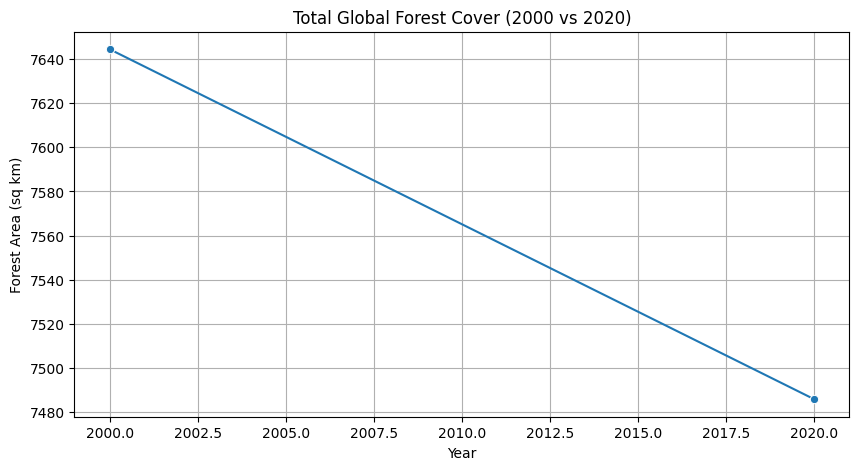

In [ ]:
df.columns = ['country_code', 'forest2000', 'forest2020', 'trend','loss','percent_loss']

# Calculate forest loss (2000 - 2020)
df["forest_loss"] = df["forest2000"] - df["forest2020"]

# Create a simple dataframe to simulate year-wise data for plotting
df_plot = pd.DataFrame({
    "Year": [2000,2020],
    "Forest_area": [df["forest2000"].sum(), df["forest2020"].sum()]
})

# Plot line chart
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_plot, x="Year", y="Forest_area", marker='o')
plt.title("Total Global Forest Cover (2000 vs 2020)")
plt.xlabel("Year")
plt.ylabel("Forest Area (sq km)")
plt.grid(True)
plt.show()

<ipython-input-70-833691782>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




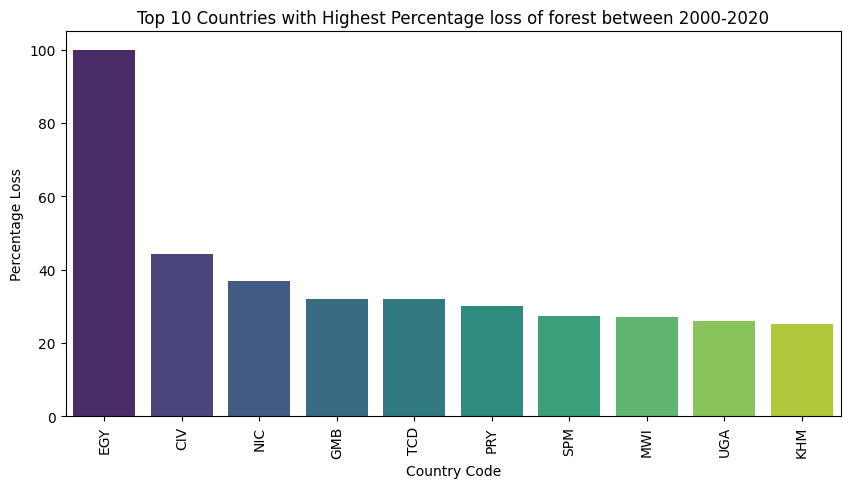

In [ ]:
top_loss=df.sort_values(by='percent_loss', ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.title("Top 10 Countries with Highest Percentage loss of forest between 2000-2020")
plt.xlabel("Country Code")
plt.ylabel("Percentage Loss")
sns.barplot(x='country_code', y='percent_loss', data=top_loss,palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [ ]:
import os
os.environ["NGROK_AUTHTOKEN"] = "2yQ5JvMz86hdZReOrwCVVlLAXDJ_tFkbFTaVuqU48BbfjCzJ"

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# Load forest.csv (make sure it's uploaded)
df = pd.read_csv("forest_degrad.csv")
df.columns = ['country_code', 'forest2000', 'forest2020', 'trend']
df['loss'] = df['forest2000'] - df['forest2020']
df['percent_loss'] = (df['loss'] / df['forest2000']) * 100

st.title("🌲 Forest Change Dashboard (2000–2020)")

top_loss = df.sort_values(by='percent_loss', ascending=False).head(10)
fig = px.bar(top_loss, x='country_code', y='percent_loss',
             title='Top 10 Countries with Highest Forest Loss (%)')
st.plotly_chart(fig)

selected_country = st.selectbox("Select a country", df['country_code'])
row = df[df['country_code'] == selected_country].iloc[0]

st.subheader("🌿 Forest Stats")
st.write(f"🌳 Forest in 2000: {row['forest2000']} sq km")
st.write(f"🌲 Forest in 2020: {row['forest2020']} sq km")
st.write(f"📉 Trend: {row['trend']}%")

Overwriting app.py


In [ ]:
from pyngrok import ngrok

!pkill streamlit

public_url = ngrok.connect(8501)
print(f"👉 Streamlit app is running at: {public_url}")

!streamlit run app.py &

👉 Streamlit app is running at: NgrokTunnel: "https://fb32-34-16-221-53.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.221.53:8501

  Stopping...


In [ ]:
def slogan_gen():
    prompt = "Create a short, catchy environmental slogan to save evergreen forests."
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message["content"]

if st.button("Generate Slogan"):
    st.success(slogan_gen())

2025-06-12 19:47:53.918 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 19:47:53.919 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 19:47:53.920 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 19:47:53.921 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 19:47:53.922 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
from transformers import pipeline

@st.cache_resource
def load_slogan_generator():
    return pipeline("text-generation", model="gpt2")

generator = load_slogan_generator()

if st.button("🎤 Generate Slogan to Save Forests"):
    prompt = "Slogan to save evergreen forests:"
    slogan = generator(prompt, max_new_tokens=10, do_sample=True)[0]['generated_text']
    st.success("🪧 " + slogan.strip())

2025-06-12 19:47:55.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 19:47:55.265 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 19:47:55.266 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 19:47:55.268 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-12 19:47:55.270 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [ ]:
!pip install requests

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
from transformers import pipeline
import requests
from PIL import Image
from io import BytesIO
import os

# --- Dataset Section ---
df = pd.read_csv("forest_degrad.csv")
df.columns = ['country_code', 'forest2000', 'forest2020', 'trend']
df['loss'] = df['forest2000'] - df['forest2020']
df['percent_loss'] = (df['loss'] / df['forest2000']) * 100

st.title("🌲 Forest Change Dashboard (2000–2020)")

top_loss = df.sort_values(by='percent_loss', ascending=False).head(10)
fig = px.bar(top_loss, x='country_code', y='percent_loss',
             title='Top 10 Countries with Highest Forest Loss (%)')
st.plotly_chart(fig)

selected_country = st.selectbox("Select a country", df['country_code'])
row = df[df['country_code'] == selected_country].iloc[0]

st.subheader("🌿 Forest Stats")
st.write(f"🌳 Forest in 2000: {row['forest2000']} sq km")
st.write(f"🌲 Forest in 2020: {row['forest2020']} sq km")
st.write(f"📉 Trend: {row['trend']}%")

# --- AI Slogan Generator ---
@st.cache_resource
def load_slogan_generator():
    return pipeline("text-generation", model="gpt2")

generator = load_slogan_generator()

if st.button("🎤 Generate Forest Slogan"):
    prompt = "Slogan to save evergreen forests:"
    slogan = generator(prompt, max_new_tokens=10, do_sample=True)[0]['generated_text']
    st.success("🪧 " + slogan.strip())

# --- AI Poster Generator ---
HUGGINGFACE_TOKEN = "your_huggingface_token_here"  # Replace with your token

def generate_poster(prompt):
    API_URL = "https://api-inference.huggingface.co/models/stabilityai/stable-diffusion-2"
    headers = {"Authorization": f"Bearer {HUGGINGFACE_TOKEN}"}
    payload = {"inputs": prompt}
    response = requests.post(API_URL, headers=headers, json=payload)
    return Image.open(BytesIO(response.content))

if st.button("🖼️ Generate AI Poster"):
    prompt = "a digital eco poster showing saving evergreen forests, cinematic nature art"
    with st.spinner("Creating poster..."):
        image = generate_poster(prompt)
        st.image(image, caption="AI Poster: Save Forests 🌲")

Overwriting app.py


In [ ]:
from pyngrok import ngrok
import os

os.environ["NGROK_AUTHTOKEN"] = "2yQ5JvMz86hdZReOrwCVVlLAXDJ_tFkbFTaVuqU48BbfjCzJ"  # Replace with your ngrok token

!pkill streamlit
public_url = ngrok.connect(8501)
print(f"👉 Streamlit app is running at: {public_url}")

!streamlit run app.py &

👉 Streamlit app is running at: NgrokTunnel: "https://8fcc-34-16-221-53.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.221.53:8501

2025-06-12 19:49:03.744000: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749757743.774204   35271 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749757743.783522   35271 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Device set to use cpu
2025-06-12 19:49:13.130 Examining the path of torch.classes raised:
Traceback (most recent call last):
  File "/usr/local/lib/